In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.io, scipy.optimize, scipy.special

Part 1: Multi-class classification — using one-vs-all logistic regression to classify MNIST data.

In [3]:
ex3data1 = scipy.io.loadmat("ex3data1.mat")
X_ex3data = ex3data1['X']
y_ex3data = ex3data1['y'].reshape(5000)
X_bitmap = X_ex3data.reshape(5000, 20, 20, order='F')

Let's plot some examples of the data

In [7]:
def plot_digit(n):
    plt.figure()
    plt.imshow(X_bitmap[i], cmap='binary', interpolation='bicubic')

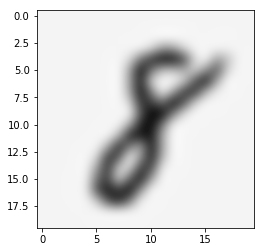

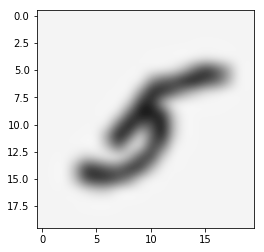

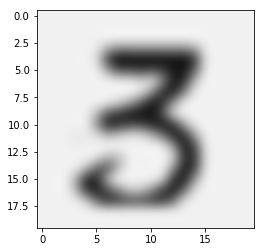

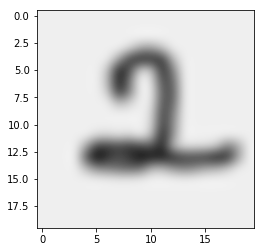

In [12]:
for i in np.random.randint(0,4999,4):
    plot_digit(i)

In [31]:
def h(theta,x):
    return scipy.special.expit(x.dot(theta))

In [32]:
def cost(theta,X,y):
    m = X.shape[0]
    return 1/m*(-y.dot(np.log(h(theta,X))) - (1-y).dot(np.log1p(-h(theta,X))))

In [33]:
def cost_gradient(theta,X,y):
    m = X.shape[0]
    return 1/m*(h(theta,X) - y).dot(X)

In [34]:
def cost_reg(theta,X,y,reg_lambda):
    m = X.shape[0]
    log_loss = -y.dot(np.log(h(theta,X))) - (1-y).dot(np.log1p(-h(theta,X)))
    reg_term = 0.5*reg_lambda*np.sum(np.power(theta[1:],2))
    return 1/m*(log_loss + reg_term)

In [35]:
def cost_gradient_reg(theta,X,y,reg_lambda):
    m = X.shape[0]
    theta_tmp = np.insert(theta[1:],0,0)
    return 1/m*((h(theta,X) - y).dot(X) + reg_lambda*theta_tmp)

In [101]:
def one_vs_all_fit(k,X,y,reg_lambda):
    num_features = X.shape[1]
    param_matrix = np.zeros((k,num_features))
    for i in range(1,k+1):
        class_y = np.equal(y,i)
        print("Fitting class " + str(i))
        param_matrix[i-1] = scipy.optimize.fmin_cg(lambda z: cost_reg(z,X,class_y,reg_lambda),
                                                   param_matrix[i-1],
                                                   lambda z: cost_gradient_reg(z,X,class_y,reg_lambda))
    return param_matrix

In [102]:
theta_min_matrix = one_vs_all(10,X_ex3data,y_ex3data,1)

Fitting class 1
Optimization terminated successfully.
         Current function value: 0.027978
         Iterations: 64
         Function evaluations: 224
         Gradient evaluations: 224
Fitting class 2
Optimization terminated successfully.
         Current function value: 0.073193
         Iterations: 100
         Function evaluations: 289
         Gradient evaluations: 289
Fitting class 3
Optimization terminated successfully.
         Current function value: 0.083249
         Iterations: 103
         Function evaluations: 280
         Gradient evaluations: 280
Fitting class 4
Optimization terminated successfully.
         Current function value: 0.053687
         Iterations: 84
         Function evaluations: 253
         Gradient evaluations: 253
Fitting class 5
Optimization terminated successfully.
         Current function value: 0.076876
         Iterations: 117
         Function evaluations: 326
         Gradient evaluations: 326
Fitting class 6
Optimization terminated success

In [132]:
def one_vs_all_predict(k,theta_matrix,x):
    prediction = np.zeros(x.shape[0])
    prob = np.zeros(x.shape[0])
    for i in range(1,k+1):
        tmp_theta = theta_matrix[i-1]
        tmp_prob = h(tmp_theta,x)
        prediction[np.nonzero(tmp_prob > prob)] = i
        prob = np.maximum(prob,tmp_prob)
    return prediction,prob

In [133]:
one_vs_all_predict(10,theta_min_matrix,X_ex3data[1998:2002])

(array([3., 5., 4., 4.]),
 array([0.96407714, 0.76673607, 0.92006075, 0.99896369]))

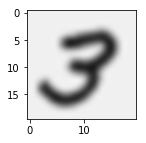

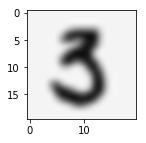

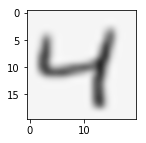

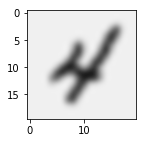

In [141]:
plot_digit(1998)
plot_digit(1999)
plot_digit(2000)
plot_digit(2001)

In [136]:
def one_vs_all_accuracy(k,theta,X,y):
    predicted = one_vs_all_predict(k,theta,X)
    return np.mean(np.isclose(predicted[0],y))

In [137]:
one_vs_all_accuracy(10,theta_min_matrix,X_ex3data,y_ex3data)

0.9412

Part 2: Implementing feedforward neural network with pre-trained weights

In [142]:
ex3weights = scipy.io.loadmat("ex3weights.mat")

In [145]:
Theta1, Theta2 = ex3weights['Theta1'], ex3weights['Theta2']

In [147]:
print(Theta1.shape)
print(Theta2.shape)

(25, 401)
(10, 26)


In [215]:
def nn_predict(theta1,theta2,x):
    # input layer: add bias node to input data
    a1 = np.insert(x,0,1,axis=1)
    # hidden layer: compute activation function and add bias
    z2 = a1.dot(theta1.transpose())
    a2 = np.insert(scipy.special.expit(z2),0,1,axis=1)
    # output layer
    a3 = scipy.special.expit(a2.dot(theta2.transpose()))
    return a3

In [219]:
np.argmax(nn_predict(Theta1,Theta2,X_ex3data),axis=1)

array([9, 9, 9, ..., 8, 8, 8])

In [232]:
def nn_accuracy(theta1,theta2,x,y):
    prediction = np.argmax(nn_predict(Theta1,Theta2,X_ex3data),axis=1) + 1
    return np.mean(np.isclose(prediction,y))

In [233]:
nn_accuracy(Theta1,Theta2,X_ex3data,y_ex3data)

0.9752